**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [2]:
#@ IMPORTING NECESSARY LIBRARIES AND DEPENDENCIES:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np

**LENET ARCHITECTURE:**
- I will define the build method of **LeNet** architecture below. It requires four parameters: **width** of input image, **height** of input image, **depth** of image, number of **class labels** in the classification task. The **Sequential** class, the building block of sequential networks sequentially stack one layer on top of the other layer initialized below. 

In [3]:
#@ DEFINING LENET ARCHITECTURE: 
class LeNet:                                                    # Defining LeNet Class. 
    @staticmethod
    def build(width, height, depth, classes):                   # Defining Build Method. 
        model = Sequential()                                    # Initializing Sequential Model. 
        inputShape = (height, width, depth)                     # Initializing Input Shape. 
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)                 # Initializing Input Shape. 
        model.add(Conv2D(20, (5, 5), padding="same", 
                         input_shape=inputShape))               # Adding Convolutional Layer. 
        model.add(Activation("relu"))                           # Adding RELU Activation Function. 
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))  # Decreasing 75% Input Size. 
        model.add(Conv2D(50, (5, 5), padding="same"))           # Adding Convolutional Layer. 
        model.add(Activation("relu"))                           # Adding RELU Activation Function. 
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))  # Decreasing 75% Input Size. 
        model.add(Flatten())                                    # Adding Flatten Layer. 
        model.add(Dense(500))                                   # Adding Fully Connected Layer. 
        model.add(Activation("relu"))                           # Adding RELU Activation Function. 
        model.add(Dense(classes))                               # Adding FC Dense Layer. 
        model.add(Activation("softmax"))                        # Adding Softmax Classifier. 
        return model

**LENET on MNIST:**
- Each **MNIST** sample inside data is represented by a 784 dimensional raw pixel intensities of a 28X28 grayscale image. 

In [5]:
#@ GETTING THE DATASET: 
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()   # Loading the Dataset. 
if K.image_data_format() == "channels_first":
    trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))       # Reshaping the Dataset. 
    testData = testData.reshape((testData.shape[0], 1, 28, 28))          # Reshaping the Dataset. 
else:
    trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))       # Reshaping the Dataset. 
    testData = testData.reshape((testData.shape[0], 28, 28, 1))          # Reshaping the Dataset. 

In [6]:
#@ PROCESSING THE DATASET: 
trainData = trainData.astype('float32') / 255.0                # Normalizing the Data.
testData = testData.astype('float32') / 255.0                  # Normalizing the Data. 
lb = LabelBinarizer()                                          # Initializing LabelBinarizer. 
trainLabels = lb.fit_transform(trainLabels)                    # Converting Labels into Vectors. 
testLabels = lb.transform(testLabels)                          # Converting Labels into Vectors. 

In [7]:
#@ INITIALIZING OPTIMIZER AND MODEL: 
opt = SGD(0.01)                                                   # Initializing SGD Optimizer. 
model = LeNet.build(width=28, height=28, depth=1, classes=10)     # Initializing LeNet Architecture. 
model.compile(loss="categorical_crossentropy",optimizer=opt,
              metrics=["accuracy"])                               # Compiling LeNet Model. 
H = model.fit(trainData, trainLabels, 
              validation_data=(testData, testLabels), 
              batch_size=128, epochs=20, verbose=1)               # Training LeNet Model.

Epoch 1/20
469/469 [==============================] - 18s 13ms/step - loss: 0.9274 - accuracy: 0.7520 - val_loss: 0.3026 - val_accuracy: 0.9131
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2503 - accuracy: 0.9264 - val_loss: 0.2037 - val_accuracy: 0.9403
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1784 - accuracy: 0.9476 - val_loss: 0.1571 - val_accuracy: 0.9520
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1387 - accuracy: 0.9593 - val_loss: 0.1278 - val_accuracy: 0.9603
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1154 - accuracy: 0.9658 - val_loss: 0.1032 - val_accuracy: 0.9665
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1002 - accuracy: 0.9700 - val_loss: 0.0854 - val_accuracy: 0.9734
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0882 - accuracy: 0.9741 - val_loss: 0.0756 - val_accuracy: 0.977

**MODEL EVALUATION:**

In [8]:
#@ INITIALIZING MODEL EVALUATION:
predictions = model.predict(testData, batch_size=128)                     # Getting Model Predictions. 
print(classification_report(testLabels.argmax(axis=1),
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))  # Inspecting Classification Report.

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



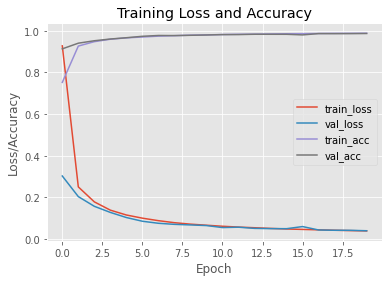

In [9]:
#@ INSPECTING TRAINING LOSS AND ACCURACY:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show();